# Insurance  Data Analysis | Linear Regression 

This dataset contains information related to insurance company. 
The dataset consisit of only 1338 recods.

CONTENT:

Columns
* age : age of primary benificiary

* sex : insurance contractor gender, female, male.

* bmi : Body mass index, providing an understanding of body, weights that are relatively high or  low to height, objective       index of body weight(kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9

* children : Number of children covered by health insurance/ Number of dependents
* smoker : Smoking 
* region :  The benificiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges : Individual medical costs billed by health insurance.    


### Import necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### loading the dataset


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

### Finding Null value

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null value in given insurance dataset

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### ploting pie plot of customer's children

([<matplotlib.patches.Wedge at 0x161d8b5fbe0>,
 [Text(0.2433339569121191, 1.0727481463109088, '0'),
  Text(-1.046002438240317, -0.3404098987916066, '1'),
  Text(0.0748425389560056, -1.0974509530555883, '2'),
  Text(0.9257594837824609, -0.5941122605929219, '3'),
  Text(1.0887366469207436, -0.1570111895750635, '4'),
  Text(1.0990177277424016, -0.046476167095929784, '5')],
 [Text(0.13272761286115586, 0.5851353525332229, '42.9%'),
  Text(-0.5705467844947183, -0.18567812661360358, '24.2%'),
  Text(0.04082320306691214, -0.5986096107575936, '17.9%'),
  Text(0.5049597184267968, -0.3240612330506846, '11.7%'),
  Text(0.59385635286586, -0.0856424670409437, '1.9%'),
  Text(0.5994642151322189, -0.02535063659777988, '1.3%')])

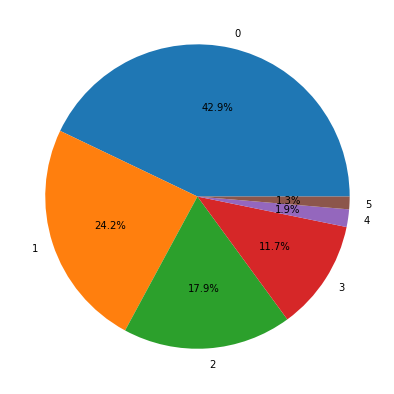

In [9]:
#making a pie diagram for number of childern 
plt.figure(figsize=(7,7))
plt.pie(list(df['children'].value_counts()),labels=list(df['children'].value_counts().keys()),autopct='%0.1f%%')

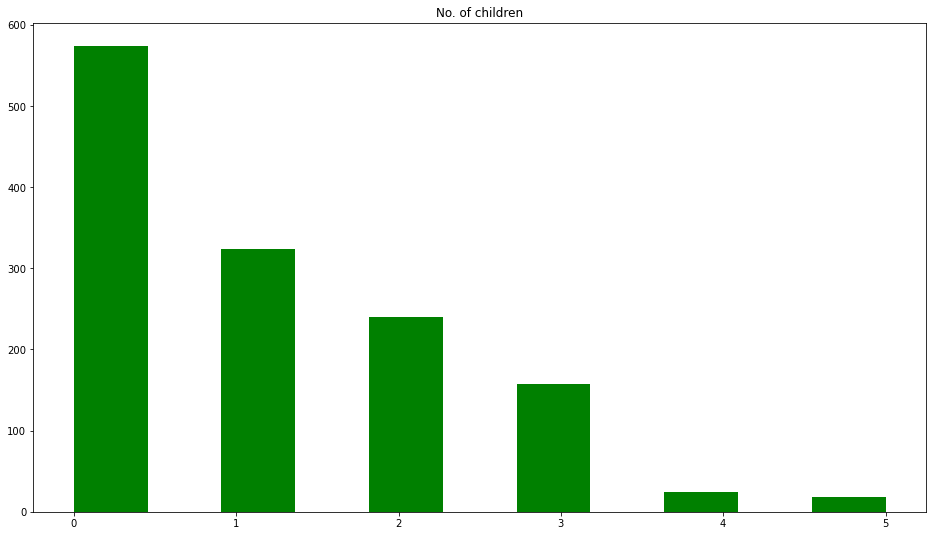

In [10]:
#histogram for number of children
plt.figure(figsize=(16,9))
plt.hist(data= df, x ="children", bins= 11, color= "green")
plt.title('No. of children')
plt.show()

In [11]:
#checking for the smoker
df["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [12]:
##looking at the number of smoker in the dataset
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

(array([ 274.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1064.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

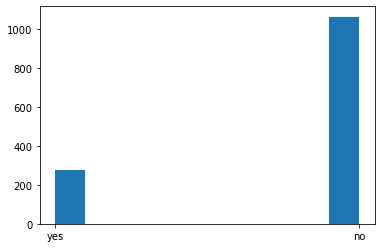

In [13]:
#making histogram for smoker
plt.hist(data= df, x ="smoker")


([<matplotlib.patches.Wedge at 0x161d93f93a0>,
 [Text(-0.8801026332278259, 0.6598631335250117, 'no'),
  Text(0.8801026332278258, -0.6598631335250118, 'yes')],
 [Text(-0.48005598176063224, 0.3599253455590972, '79.5%'),
  Text(0.48005598176063213, -0.3599253455590973, '20.5%')])

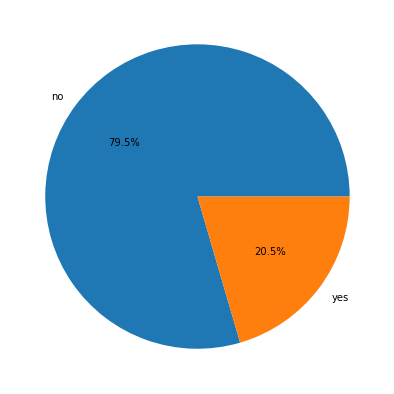

In [14]:
#making a pie plot for the smoker in dataset
plt.figure(figsize=(7,7))
plt.pie(list(df['smoker'].value_counts()),labels=list(df['smoker'].value_counts().keys()),autopct='%0.1f%%')

<AxesSubplot:xlabel='smoker', ylabel='children'>

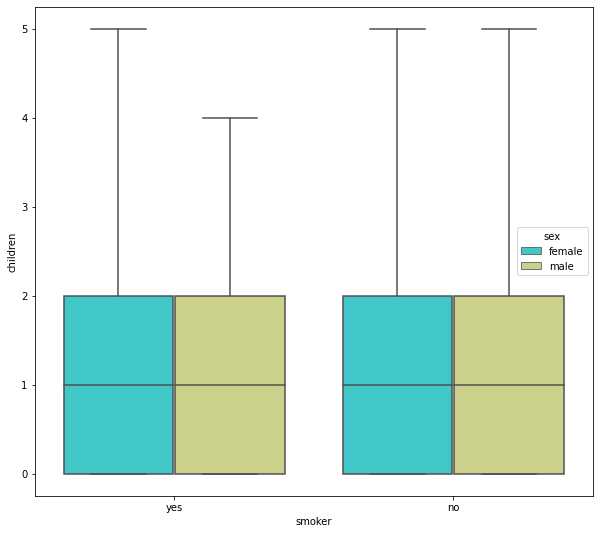

In [15]:

plt.figure(figsize=(10,9))
sns.boxplot(data= df,y="children",x="smoker",hue="sex", palette="rainbow")

([<matplotlib.patches.Wedge at 0x161d950bc70>,
 [Text(-0.018078568997004985, 1.0998514287589123, 'male'),
  Text(0.018078568997005343, -1.0998514287589123, 'female')],
 [Text(-0.009861037634729992, 0.5999189611412249, '50.5%'),
  Text(0.009861037634730185, -0.5999189611412248, '49.5%')])

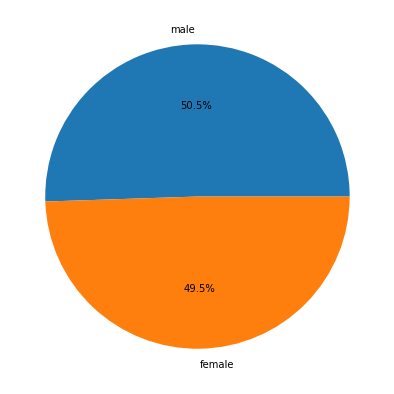

In [16]:
##making a pie diagram for male and female in data set
plt.figure(figsize=(7,7))
plt.pie(list(df['sex'].value_counts()),labels=list(df['sex'].value_counts().keys()),autopct='%0.1f%%')

In [17]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

 making a pie plot for the belonging region


([<matplotlib.patches.Wedge at 0x161d955f4f0>,
 [Text(0.722119686055283, 0.8297850077046582, 'southeast'),
  Text(-0.8627681631663758, 0.6823716704454532, 'southwest'),
  Text(-0.7201694244483215, -0.8314782018127556, 'northwest'),
  Text(0.7967551940047443, -0.7584069889092945, 'northeast')],
 [Text(0.39388346512106337, 0.4526100042025408, '27.2%'),
  Text(-0.47060081627256856, 0.37220272933388354, '24.3%'),
  Text(-0.3928196860627208, -0.45353356462513933, '24.3%'),
  Text(0.4345937421844059, -0.41367653940506965, '24.2%')])

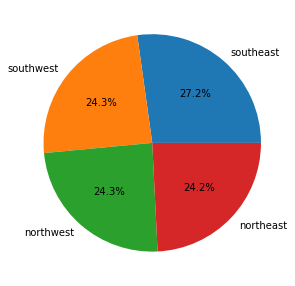

In [18]:

plt.figure(figsize=(10,5))
plt.pie(list(df['region'].value_counts()),
        labels=list(df['region'].value_counts().keys()),
        autopct='%0.1f%%')

By the above pie plot southeast customers take more insurance in compare to other region.


In [19]:
df1= pd.get_dummies(df,drop_first=True)
df1

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


## Linear Regression Model Fitting

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x= df1.drop("charges",axis=1)
y= df1["charges"]

In [22]:
df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Split Dataset to train & test 

In [23]:
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size=0.17,random_state= 1)


# we have consider 85% for train 
# we have consider 15% for test

In [24]:
print(x_train.shape)
print(x_test.shape)

(1110, 8)
(228, 8)


### Train the model using the X_train and y_train

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
lr.coef_

array([  260.27525521,   326.65825401,   411.78860869,  -247.65353565,
       23811.30992624,  -444.12943215,  -966.5609156 ,  -926.52670307])

In [27]:
lr.intercept_

-11564.391314816767

In [28]:
pd.DataFrame(lr.coef_, x.columns, columns=["Coeficient"])

,Coeficient
age,260.275255
bmi,326.658254
children,411.788609
sex_male,-247.653536
smoker_yes,23811.309926
region_northwest,-444.129432
region_southeast,-966.560916
region_southwest,-926.526703


### Now  Predicting test data 

In [29]:
x_test[0:5]
lr.predict(x_test[0:5])

array([ 4295.22333156, 12882.31659619, 12621.8218609 , 13423.39294568,
         423.47647917])

In [30]:
lr.predict(x_test)

array([ 4295.22333156, 12882.31659619, 12621.8218609 , 13423.39294568,
         423.47647917, 32092.81173687, 13051.41006487, 12351.81575071,
        3718.30139229, 29534.32004471, 11098.4900534 , 17642.46344351,
        8759.83433948,  8325.52067621,  3153.19251348, 10443.29718535,
        3749.68479683,  6902.51537688, 15166.6358725 , 14491.20183866,
       12583.65536663, 33079.98599756,  9025.64095923,  8964.30076395,
        2957.87659866,  8105.62749512,  9552.52677964, 10849.77962614,
        7668.79917862,  4312.93195315, 14190.6503765 ,  5754.13719951,
       34662.61608711, 26927.2969608 , 33453.05163844,  9482.74298135,
       30412.03239582, 26580.79029513, 15321.01739124, 33888.40772875,
        6360.05451542, 14073.56787534, 10809.07556558, 15148.47833671,
        4110.32690587, 13145.26323592,  4372.99089613, 28668.94479332,
        7161.69875391, 14321.31050896, 13410.78588122, 12349.5483805 ,
        1717.53284122,  8851.95142099, 26033.37810813, 10242.68392892,
      

In [31]:
y_test

559      1646.42970
1087    11353.22760
1020     8798.59300
460     10381.47870
802      2103.08000
           ...     
169      4827.90495
349      1635.73365
452      1969.61400
1277     4357.04365
1331    10795.93733
Name: charges, Length: 228, dtype: float64

### Model Evaluating

In [32]:
lr.score(x_test, y_test)

0.7511349424272281

###### 75%  got accurancy by linear Regression

In [33]:
from sklearn import metrics


In [34]:
#Using Metrics To Evaluate

from sklearn import metrics
y_pred=lr.predict(x_test)

MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])


,Metrics
MAE,3.965306e+03
MSE,3.543334e+07
RMSE,5.952591e+03


### Residuals (difference between y_test and y_pred)

In [35]:
test_residuals=y_test-y_pred
test_residuals

559    -2648.793632
1087   -1529.088996
1020   -3823.228861
460    -3041.914246
802     1679.603521
           ...     
169     2201.677791
349     -145.854417
452      817.776284
1277   -1676.426953
1331    6390.138794
Name: charges, Length: 228, dtype: float64

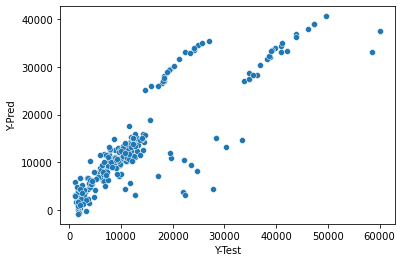

In [36]:
## scatterplot between y_test, y_pred)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')
plt.show()

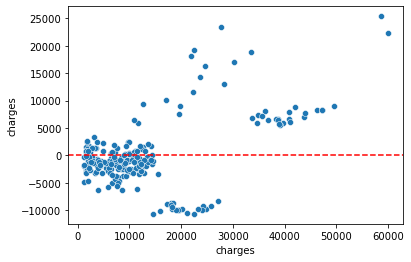

In [37]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')
plt.show()

### Saving and Loading the model 

In [38]:
import pickle

In [39]:
with open("insurance_data_analysis","wb") as f:
    pickle.dump(lr,f)

In [40]:
with open("insurance_data_analysis","rb") as f:
    mp= pickle.load(f)

In [41]:
mp.predict(x_test)

array([ 4295.22333156, 12882.31659619, 12621.8218609 , 13423.39294568,
         423.47647917, 32092.81173687, 13051.41006487, 12351.81575071,
        3718.30139229, 29534.32004471, 11098.4900534 , 17642.46344351,
        8759.83433948,  8325.52067621,  3153.19251348, 10443.29718535,
        3749.68479683,  6902.51537688, 15166.6358725 , 14491.20183866,
       12583.65536663, 33079.98599756,  9025.64095923,  8964.30076395,
        2957.87659866,  8105.62749512,  9552.52677964, 10849.77962614,
        7668.79917862,  4312.93195315, 14190.6503765 ,  5754.13719951,
       34662.61608711, 26927.2969608 , 33453.05163844,  9482.74298135,
       30412.03239582, 26580.79029513, 15321.01739124, 33888.40772875,
        6360.05451542, 14073.56787534, 10809.07556558, 15148.47833671,
        4110.32690587, 13145.26323592,  4372.99089613, 28668.94479332,
        7161.69875391, 14321.31050896, 13410.78588122, 12349.5483805 ,
        1717.53284122,  8851.95142099, 26033.37810813, 10242.68392892,
      

In [42]:
#loading_model:
from joblib import dump,load
load_model= load("insurance_data_analysis")


* The prediction is far from reality.
* That could have several reasons , for example we didn't remove outliers.
* we did not normalize the label distribution etc.